<a href="https://colab.research.google.com/github/hotdog1029/deeplearning/blob/main/ResNet_%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

사용할 파이토치 버전:  1.7.0+cu101 Device:  cuda


Extracting ../data/CIFAR_10/cifar-10-python.tar.gz to ../data/CIFAR_10
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


x_trian:  torch.Size([32, 3, 32, 32]) torch.FloatTensor
y_trian:  torch.Size([32]) torch.LongTensor



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=

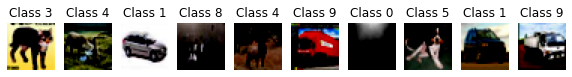

In [ ]:
# 1. 사용할 모듈 임포트하기
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets 

# 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print('사용할 파이토치 버전: ', torch.__version__, 'Device: ',DEVICE)

BATCH_SIZE = 32
EPOCHS = 10

# 3. CIFAR10 데이터 다운로드 (train set, test set 분리하기)
train_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                 train = True,
                                 download = True,
                                 transform = transforms.Compose([ # transforms.Compose()는 불러오는 이미지 데이터에 전처리 및 Augmentation을 다양하게 적용할 때 이용하는 메서드이다.
                                   transforms.RandomHorizontalFlip(), # 해당 이미지를 50%의 확률로 좌우 반전하는 것을 의미
                                   transforms.ToTensor(), # 0에서 1사이의 값으로 정규화하며 딥러닝 모델의 input으로 이용될 수 있도록 Tensor 형태로 변환시켜주는 전처리 과정을 의미한다.
                                   transforms.Normalize((0.5,0.5,0.5), # ToTensor() 형태로 전환된 이미지에 대해 또 다른 정규화를 진행하는 것을 의미한다. 정규화를 진행할 때는 평균과 표준편차 필요한데, red,green,blue 순으로 평균 0.5 씩 적용하는 것을 의미
                                   (0.5,0.5,0.5))]))
                                                                 
test_dataset = datasets.CIFAR10(root = '../data/CIFAR_10',
                                 train = False,
                                 download = True,
                                 transform = transforms.Compose([
                                   transforms.RandomHorizontalFlip(),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5,0.5,0.5),
                                   (0.5,0.5,0.5))]))
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

# 4. 데이터 확인하기
for(x_train, y_train) in train_loader:
  print('x_trian: ',x_train.size(),x_train.type())  # 32개의 이미지 데이터가 1개의 미니배치를 구성하고 있고 가로 32개, 세로 32개의 픽셀로 구성돼 있고 채널이 3이므로 빨강,초록,파랑 색상으로 이뤄진, 다시말해 컬러로 이뤄진 이미지 데이터라는 것을 확인할 수 있다.
  print('y_trian: ',y_train.size(),y_train.type())  # 32개의 이미지 데이터 각각에 대해 label 값이 1개씩 존재하기 때문에 32개의 값을 갖고 있는 것을 확인할 수 있다.
  break

# 5. 데이터 확인하기 (1)
pltsize = 1
plt.figure(figsize = (10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.axis('off')
  plt.imshow(np.transpose(x_train[i],(1,2,0)))
  plt.title('Class '+ str(y_train[i].item()))

# 6. ResNet 모델 설계하기
class BasicBlock(nn.Module): # ResNet 모델은 내부에 반복적으로 이용하는 Block을 바탕으로 구성돼 있다. 따라서 반복적으로 이용하는 Block을 먼저 정의한 후 정의된 Block을 바탕으로 ResNet을 구현한다.
  def __init__(self, in_planes, planes, stride = 1):
    super(BasicBlock,self).__init__()
    self.conv1 = nn.Conv2d(in_planes, planes,
                           kernel_size = 3,
                           stride = stride,
                           padding = 1,
                           bias = False)
    self.bn1 = nn.BatchNorm2d(planes)
    self.conv2 = nn.Conv2d(planes, planes,
                           kernel_size = 3,
                           stride = 1,
                           padding = 1,
                           bias = False)
    self.bn2 = nn.BatchNorm2d(planes)
    
    self.shortcut = nn.Sequential()
    if stride != 1 or in_planes != planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes, planes,
                    kernel_size = 1,
                    stride = stride,
                    bias = False),
          nn.BatchNorm2d(planes))
  def forward(self,x):
    out = self.conv1(x)
    out = self.bn1(out)
    out = F.relu(out)
    out = self.conv2(out)
    out = self.bn2(out)
    out += self.shortcut(x)
    out = F.relu(out)
    return out

class ResNet(nn.Module):
  def __init__(self, num_classes = 10):
    super(ResNet,self).__init__()
    self.in_planes = 16

    self. conv1 = nn.Conv2d(3,16,
                            kernel_size = 3,
                            stride = 1,
                            padding = 1,
                            bias = False)
    self.bn1 = nn.BatchNorm2d(16)
    self.layer1 = self._make_layer(16,2,stride = 1)
    self.layer2 = self._make_layer(32,2,stride = 2)
    self.layer3 = self._make_layer(64,2,stride = 2)
    self.linear = nn.Linear(64, num_classes)
  
  def _make_layer(self, planes, num_blocks, stride):
    strides = [stride] + [1] * (num_blocks - 1)
    layers = []
    for stride in strides:
      layers.append(BasicBlock(self.in_planes, planes, stride))
      self.in_planes = planes
    return nn.Sequential(*layers)

  def forward(self,x):
    out = F.relu(self.bn1(self.conv1(x)))
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = F.avg_pool2d(out, 8)
    out = out.view(out.size(0),-1)
    out = self.linear(out)
    return out

# 7. optimizer , objective function 설정
model = ResNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

# 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model,train_loader, optimizer, log_interval):
  model.train() 
  for batch_idx,(image,label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step() 
    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{}({:.0f}%(]\tTrain Loss: {:.6f}'.format(
          Epoch, batch_idx * len(image),
          len(train_loader.dataset), 100. * batch_idx / len(train_loader),
          loss.item()))
      
# 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

# 10. MLP 학습을 실행하며 Train, Test Set의 Loss 및 정확도 확인
for Epoch in range(1, EPOCHS+1):
  train(model, train_loader, optimizer, log_interval = 200)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print('\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n'.
        format(Epoch, test_loss, test_accuracy))

기본 CNN 모델을 사용하면 정확도가 약 63%가 나오는 것에 비해 ResNet 모델을 사용하면 정확도가 약 83%가 나오는 것을 확인할 수 있다.